# ObsPy Earthquake Catalog Example
These few lines of code allow us to download from the USGS earthquake catalog using [ObsPy](http://obspy.org), an open-source toolbox for seismological tasks.


To run, you will need to have obspy and cartopy installed.
`conda install -c obspy obspy` and `conda install -c conda-forge cartopy`
should do it if you have neither.

In [40]:
%matplotlib inline

# Import Client (for downloading data) and UTCDateTime (for handling time information)
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

import numpy as np
import matplotlib.pyplot as plt

# Set client to USGS
client = Client('USGS')

Let's just say we're interested in grabbing events located in Washington since 2000 that are above magnitude 4.0. The full set of parameters you can send to `get_events()` is [here](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html).

In [7]:
# Timing: since 2000
t = UTCDateTime("2000-01-01T00:00:00")

# Minimum magnitude: M4+
mag = 4

# Location: roughly within Washington state
minlat = 45.5
maxlat = 49
minlon = -125
maxlon = -117

catalog = client.get_events(starttime=t, minmagnitude=4, minlatitude=minlat, \
                            maxlatitude=maxlat, minlongitude=minlon, maxlongitude=maxlon)

Printing the catalog we see there are 19 events and they have some metadata associated with them...

In [8]:
catalog

19 Event(s) in Catalog:
2017-02-23T04:59:04.050000Z | +47.480, -123.035 | 4.09 ml | manual
2015-12-30T07:39:29.310000Z | +48.587, -123.300 | 4.79 ml | manual
...
2001-06-10T13:19:11.290000Z | +47.167, -123.502 | 5.0 md | manual
2001-02-28T18:54:32.830000Z | +47.149, -122.727 | 6.8 md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

The catalog has a default option for plotting that's pretty decent if you don't want anything fancy. Here the depths of the earthquakes are color coded by default. The big green dot near (47,-123) is the Nisqually earthquake.

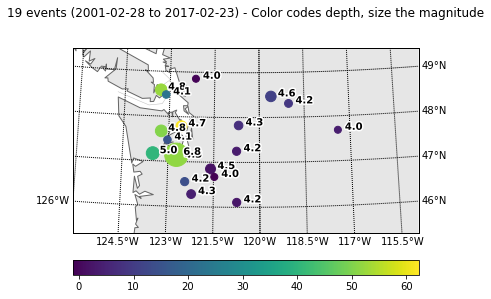

In [31]:
fig = catalog.plot(projection='local')

If we look at the entry for the last element in the catalog we can get a bit more information about the Nisqually earthquake specifically:

In [32]:
catalog[-1]

Event:	2001-02-28T18:54:32.830000Z | +47.149, -122.727 | 6.8 md | manual

	            resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=uw10530748&format=quakeml")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='uw', creation_time=UTCDateTime(2017, 4, 26, 17, 58, 44, 341000), version='3')
	    preferred_origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/uw10530748/uw/1469233837010/product.xml")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/uw10530748/uw/1469233837010/product.xml#magnitude")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

And then dialing down into the origin information we can find where the hypocenter information live (latitude, longitude, depth). Depth is in meters, by the way. The magnitude lives in magnitudes instead of origins.

In [66]:
catalog[-1].origins[0]

Origin
	        resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/uw10530748/uw/1469233837010/product.xml")
	               time: UTCDateTime(2001, 2, 28, 18, 54, 32, 830000)
	          longitude: -122.7266667
	           latitude: 47.149
	              depth: 51798.0 [uncertainty=920.0]
	            quality: OriginQuality(used_phase_count=66, used_station_count=67, standard_error=0.2, azimuthal_gap=31.0)
	 origin_uncertainty: OriginUncertainty(horizontal_uncertainty=517.0, preferred_description='horizontal uncertainty')
	    evaluation_mode: 'manual'
	      creation_info: CreationInfo(agency_id='UW', creation_time=UTCDateTime(2016, 7, 23, 0, 30, 37, 10000), version='3')

A little bit of quick list comprehension and we can grab basically anything we want out of the structure.

In [59]:
lats = np.array([catalog[i].origins[0].latitude for i in range(len(catalog))])
lons = np.array([catalog[i].origins[0].longitude for i in range(len(catalog))])

# Convert depth to km, make +depth into -z
zs = np.array([catalog[i].origins[0].depth for i in range(len(catalog))])/-1000
mags = np.array([catalog[i].magnitudes[0].mag for i in range(len(catalog))])

# UTCDateTime is nice for some things, but let's just grab the year
years = [catalog[i].origins[0].time.year for i in range(len(catalog))]

Not sure past here what you might want to do with these arrays. For a very quick example I just drew up a quick scatter plot of longitude and depth, with color by year and size by magnitude. Throwing these on an interactive map would be much cooler, though!

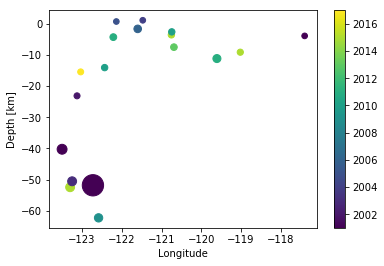

In [69]:
plt.scatter(lons,zs,(mags/2)**5,years)
plt.xlabel('Longitude')
plt.ylabel('Depth [km]')
plt.colorbar()